In [1]:
import sys
import os

# Add the parent directory to the Python path
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [2]:
from architectures.DDSP import *
from auxiliar.auxiliar import *
from auxiliar.filterbanks import *
from dataset.dataset_maker import *
from loss.loss_functions import *
from signal_processors.textsynth_env import *
from training.initializer import *
from training.trainer import *
from training.auxiliar import *

import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

In [3]:
audio_path    = ".."+"/sounds/water.wav"
frame_size    = 2**15
hop_size      = 2 * 2**15
sampling_rate = 44100

dataset = SoundDataset(audio_path=audio_path, frame_size=frame_size, hop_size=hop_size, sampling_rate=sampling_rate, normalize=False)
dataset.compute_dataset()
actual_dataset = dataset.content

# Save the dataset to a file
with open("dataset.pkl", 'wb') as file:
    pickle.dump(actual_dataset, file)

Final dataset size will be:  2700


In [4]:
# Load the dataset
with open("dataset.pkl", 'rb') as file:
    actual_dataset = pickle.load(file)

In [5]:
import random
from IPython.display import Audio

def random_viewer(dataset_sounds):
    size = len(dataset_sounds)
    file_number = random.randint(0, size)
    features = dataset_sounds[file_number][0]
    audio    = dataset_sounds[file_number][1].detach().cpu().numpy()
    # print(type(features[0]), features[0].shape)
    # print(type(features[1]), features[1].shape)
    plt.plot(audio)
    title = "sp centroid: "+ str(features[0].detach().cpu().numpy()) + " and rate = "+ str(features[1].detach().cpu().numpy())
    plt.title(title)
    plt.show()
    display(Audio(data=audio, rate=44100))

2700


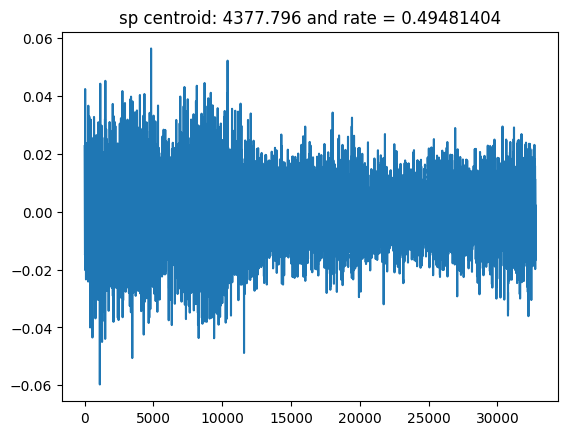

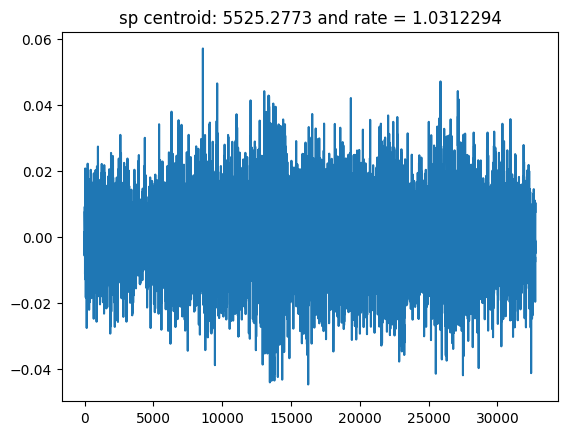

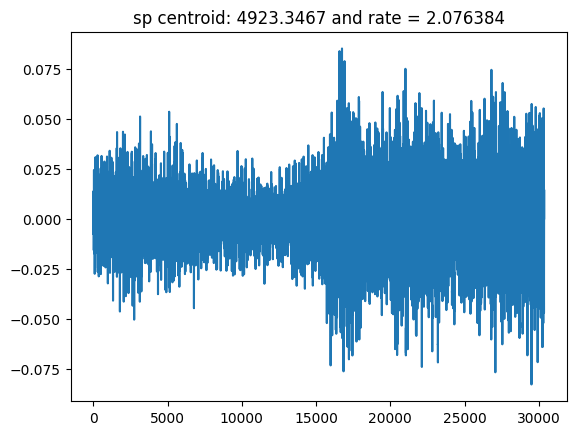

In [7]:
print(len(actual_dataset))

random_viewer(actual_dataset)
random_viewer(actual_dataset)
random_viewer(actual_dataset)